In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv(r"c:\Users\vishwas.balkundi\Downloads\MagicBricks.csv")

In [54]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [55]:
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

In [56]:
df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

C:\Users\vishwas.balkundi\AppData\Local\Temp\ipykernel_17484\3728141761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
C:\Users\vishwas.balkundi\AppData\Local\Temp\ipykernel_17484\3728141761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [57]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [58]:
df[['Parking', 'Bathroom']] = df[['Parking', 'Bathroom']].astype('int64')

In [59]:
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

In [60]:
df['Area_Yards'] = df['Area']/9

In [61]:
def grp_local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'

df['Locality'] = df['Locality'].apply(grp_local)

In [62]:
# Using Z - score to remove outliers
from scipy import stats
# Z score
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
# Removing outliers
df = df[(z < 3).all(axis=1)]

Text(0.5, 1.0, 'Area in Yards')

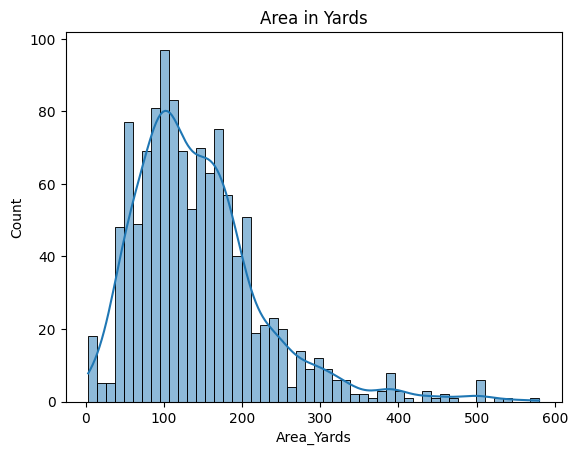

In [63]:
sns.histplot(x = df['Area_Yards'],  kde = True, bins = 50).set_title('Area in Yards')

Text(0.5, 1.0, 'BHK')

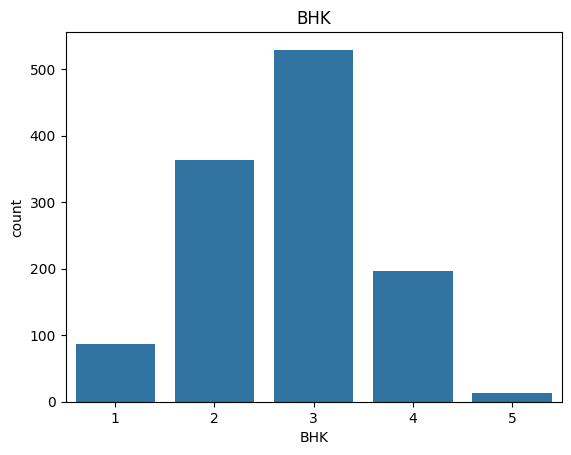

In [64]:
sns.countplot(x = 'BHK', data = df).set_title('BHK')

Text(0.5, 1.0, 'BHK vs Price')

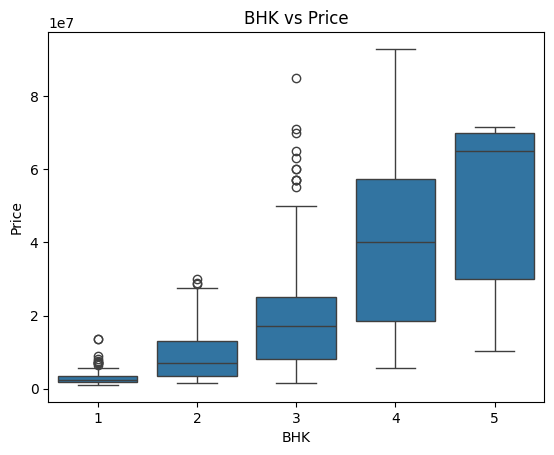

In [65]:
sns.boxplot(x = 'BHK', y = 'Price', data = df).set_title('BHK vs Price')

Text(0.5, 1.0, 'Bathroom vs Price')

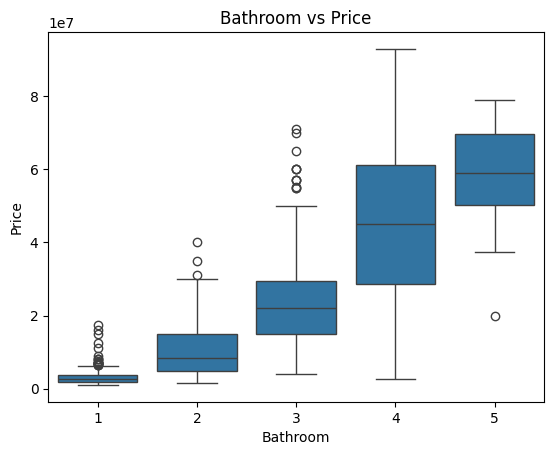

In [66]:
sns.boxplot(x = 'Bathroom', y = 'Price', data = df).set_title('Bathroom vs Price')

Text(0.5, 1.0, 'Parking vs Price')

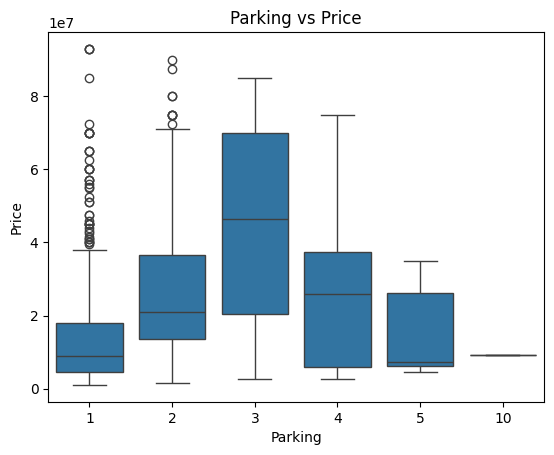

In [67]:
sns.boxplot(x = 'Parking', y = 'Price', data = df).set_title('Parking vs Price')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

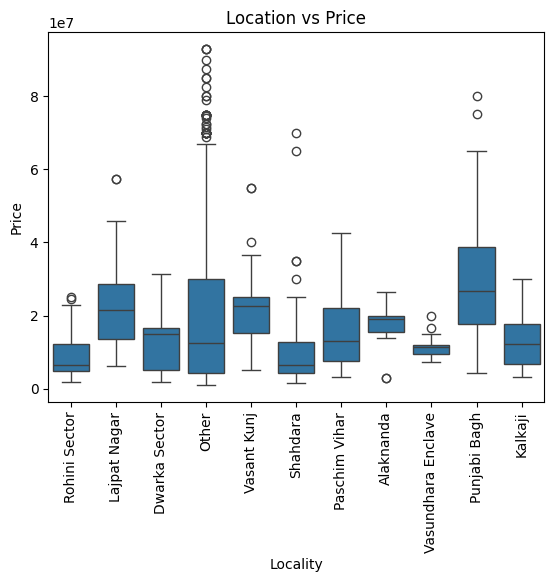

In [68]:
sns.boxplot(x='Locality', y='Price', data=df).set_title('Location vs Price')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Price vs Status')

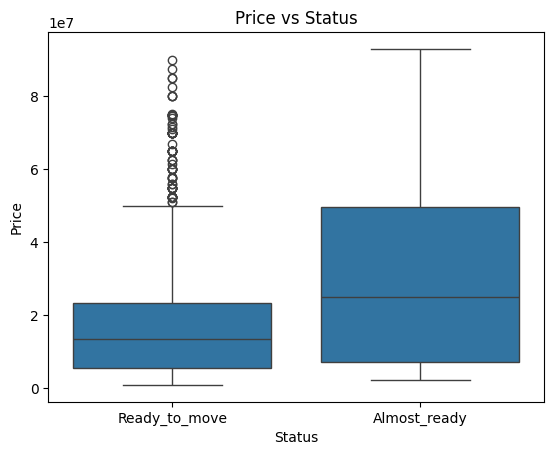

In [69]:
sns.boxplot(x = 'Status', y = 'Price', data = df).set_title('Price vs Status')

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Columns for label encoding
cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Furnishing [1 0 2]
Locality [ 7  3  1  4  9  8  5  0 10  6  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


In [71]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']] = MinMaxScaler().fit_transform(df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']])

In [72]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,0.148690,3,2,1,7,1,0.059783,1,0,1,0.097173,0.148690
1,0.139060,2,2,1,7,1,0.043478,1,0,0,0.076565,0.139060
2,0.177581,2,2,0,7,1,0.157609,1,1,0,0.076565,0.177581
3,0.110169,2,2,1,7,1,0.034783,1,1,1,0.076565,0.110169
4,0.119800,2,2,1,7,1,0.056522,1,0,1,0.076565,0.119800
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0.225732,3,3,1,4,1,0.168478,1,1,1,0.164890,0.225732
1254,0.787750,4,5,2,4,3,0.586957,1,0,1,0.164890,0.787750
1255,0.196841,3,2,1,4,3,0.125000,1,1,1,0.164890,0.196841
1256,0.163136,3,3,1,4,3,0.179348,1,0,1,0.164890,0.163136


In [73]:
df.drop(['Per_Sqft'],axis=1,inplace=True)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

In [75]:
from sklearn.tree import DecisionTreeRegressor

#creating Decision Tree Regressor object
dtr = DecisionTreeRegressor()

In [76]:
from sklearn.model_selection import GridSearchCV

# Defining parameters
parameters  = {'max_depth':[2,4,6,8],
               'min_samples_split':[2,4,6,8],
               'min_samples_leaf':[1,2,3,4],
               'max_features':['auto','sqrt','log2'],
               'random_state':[0,42]}

# Creating GridSearchCV object
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='neg_mean_squared_error')

# Fitting data to grid search object
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


c:\Users\vishwas.balkundi\miniforge3\envs\myenv2\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vishwas.balkundi\miniforge3\envs\myenv2\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vishwas.balkundi\miniforge3\envs\myenv2\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\vishwas.balkundi\miniforge3\envs\myenv2\Lib\site-packages\sklearn\base.py", line 666, in _val

In [79]:
dtr = DecisionTreeRegressor( max_depth=6, min_samples_leaf = 1, min_samples_split = 8, random_state=42)
dtr

DecisionTreeRegressor(max_depth=6, min_samples_split=8, random_state=42)

In [80]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=8, random_state=42)

In [28]:
type(df)

pandas.core.frame.DataFrame

In [81]:
dtr.score(X_train, y_train)

0.8545210312800097

In [82]:
d_pred = dtr.predict(X_test)
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.190217,0.033967
1,0.597826,0.561394
2,0.076087,0.102298
3,0.009239,0.018041
4,0.028261,0.018041
5,0.641304,0.584239
6,0.217391,0.214022
7,0.157609,0.171645
8,0.695652,0.472826
9,0.039348,0.067916


C:\Users\vishwas.balkundi\AppData\Local\Temp\ipykernel_17484\3339549931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
C:\Users\vishwas.balkundi\AppData\Local\Temp\ipykernel_17484\3339549931.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

<Axes: xlabel='Predicted', ylabel='Density'>

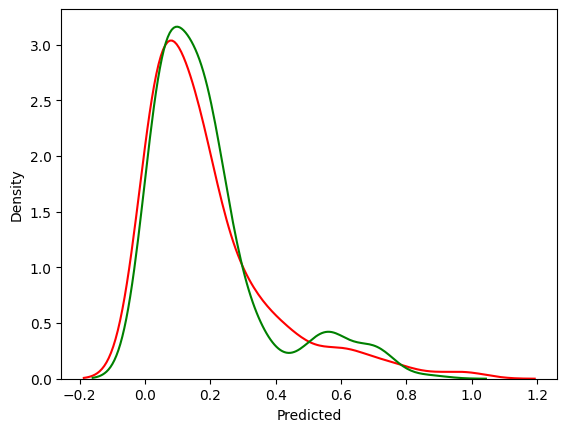

In [83]:
ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(dft['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)

In [84]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.829160558769424
Mean Squared Error:  0.006271711839596123
Mean Absolute Error:  0.05365863521857312
Root Mean Squared Error:  0.07919414018471393
